<a href="https://colab.research.google.com/github/Rajaanthonysamy/Interview_Preparation/blob/main/PlayStoreCleaningTheData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/krishnaik06/playstore-Dataset/main/googleplaystore.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head(3)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.head(1)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up


In [7]:
df["Reviews"]=df["Reviews"].astype("int64")

ValueError: invalid literal for int() with base 10: '3.0M'

In [8]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [9]:
df.drop(df.index[10472],inplace=True)

In [10]:
df[~df["Reviews"].str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [11]:
df["Reviews"]=df['Reviews'].astype("int64")

In [12]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [13]:
df[df["Size"].str.contains(r"(\.|K)", na=False) & ~df["Size"].str.contains("M", na=False)]


/tmp/ipython-input-13-898764328.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df["Size"].str.contains(r"(\.|K)", na=False) & ~df["Size"].str.contains("M", na=False)]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1532,Essential Resources,LIBRARIES_AND_DEMO,4.6,237,8.5k,"50,000+",Free,0,Everyone,Libraries & Demo,"September 27, 2017",1.02,7.1 and up


In [14]:
df["Size"].str.replace("M","000")
df["Size"].str.replace("K","")

,Size
0,19M
1,14M
2,8.7M
3,25M
4,2.8M
...,...
10836,53M
10837,3.6M
10838,9.5M
10839,Varies with device


In [15]:
def convert_to_k(val):
    if isinstance(val, str):
        val = val.strip().upper()
        try:
            if val.endswith("M"):
                return float(val[:-1]) * 1000
            elif val.endswith("K"):
                return float(val[:-1])
            else:
                return float(val)
        except ValueError:
            return None
    return val


In [16]:
df['Size']=df["Size"].apply(convert_to_k)

In [17]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [18]:
df.Price.unique()

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [19]:
df.Installs.unique()

array(['10,000+', '500,000+', '5,000,000+', '50,000,000+', '100,000+',
       '50,000+', '1,000,000+', '10,000,000+', '5,000+', '100,000,000+',
       '1,000,000,000+', '1,000+', '500,000,000+', '50+', '100+', '500+',
       '10+', '1+', '5+', '0+', '0'], dtype=object)

In [20]:
spl_char=[',','$','+']
col_to_cln=["Installs","Price"]

for col in col_to_cln:
    for char in spl_char:
        df[col]=df[col].str.replace(char,"")

In [21]:
df.Installs.unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [22]:
df.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [23]:
df.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up


In [24]:
df["Installs"]=df["Installs"].astype("int64")

In [25]:
df["Price"]=df["Price"].astype("float64")

In [26]:
df.Price.unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [27]:
df["Last Updated"]=pd.to_datetime(df["Last Updated"])

In [28]:
df["day"]=df["Last Updated"].dt.day
df["month"]=df["Last Updated"].dt.month
df["year"]=df["Last Updated"].dt.year

In [29]:
df.to_csv("cleaned_data.csv")

In [30]:
df_copy= df.copy()

In [31]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,20,6,2018


In [32]:
df_copy["App"].unique()

array(['Photo Editor & Candy Camera & Grid & ScrapBook',
       'Coloring book moana',
       'U Launcher Lite – FREE Live Cool Themes, Hide Apps', ...,
       'Parkinson Exercices FR', 'The SCP Foundation DB fr nn5n',
       'iHoroscope - 2018 Daily Horoscope & Astrology'], dtype=object)

In [33]:
df_copy[df_copy.duplicated(["App"])]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10715,FarmersOnly Dating,DATING,3.0,1145,1400.0,100000,Free,0.0,Mature 17+,Dating,2016-02-25,2.2,4.0 and up,25,2,2016
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4000.0,1000000,Free,0.0,Everyone,Communication,2018-07-06,5.2,5.0 and up,6,7,2018
10730,FP Notebook,MEDICAL,4.5,410,60000.0,50000,Free,0.0,Everyone,Medical,2018-03-24,2.1.0.372,4.4 and up,24,3,2018
10753,Slickdeals: Coupons & Shopping,SHOPPING,4.5,33599,12000.0,1000000,Free,0.0,Everyone,Shopping,2018-07-30,3.9,4.4 and up,30,7,2018


In [34]:
df_copy[df_copy["App"]=="Quick PDF Scanner + OCR FREE"]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
222,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018


In [35]:
df_copy[df_copy.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,day,month,year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000,Free,0.0,Everyone,Business,2018-02-26,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000,Free,0.0,Everyone,Business,2018-07-31,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000,Free,0.0,Everyone,Business,2018-07-24,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000,Free,0.0,Everyone,Business,2018-07-20,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000,Free,0.0,Everyone,Business,2018-07-16,4.3.0.508,4.4 and up,16,7,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,NaN,10000000,Free,0.0,Everyone,Productivity,2018-04-06,Varies with device,Varies with device,6,4,2018
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,NaN,1000000,Free,0.0,Everyone,Productivity,2018-08-06,Varies with device,Varies with device,6,8,2018
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,NaN,100000000,Free,0.0,Everyone,Productivity,2018-06-27,Varies with device,Varies with device,27,6,2018
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86000.0,10000,Free,0.0,Everyone,Medical,2018-06-01,0.6.88,5.0 and up,1,6,2018


In [36]:
df_copy.drop_duplicates(["App"],inplace=True)

In [37]:
df_copy.shape

(9659, 16)

In [38]:
10840-1181

9659

In [39]:
numeric_features=df_copy.select_dtypes(include=[np.number]).columns
str_features=df_copy.select_dtypes(include=[object]).columns

In [40]:
len(numeric_features)

8

In [41]:
len(str_features)

7

In [42]:
str_features

Index(['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [43]:
numeric_features

Index(['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month',
       'year'],
      dtype='object')

In [44]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver', 'day', 'month', 'year'],
      dtype='object')

In [45]:
df_copy.drop("Last Updated",inplace=True,axis=1)

In [46]:
!pip install matplotlib

In [47]:
len(numeric_features)

8

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

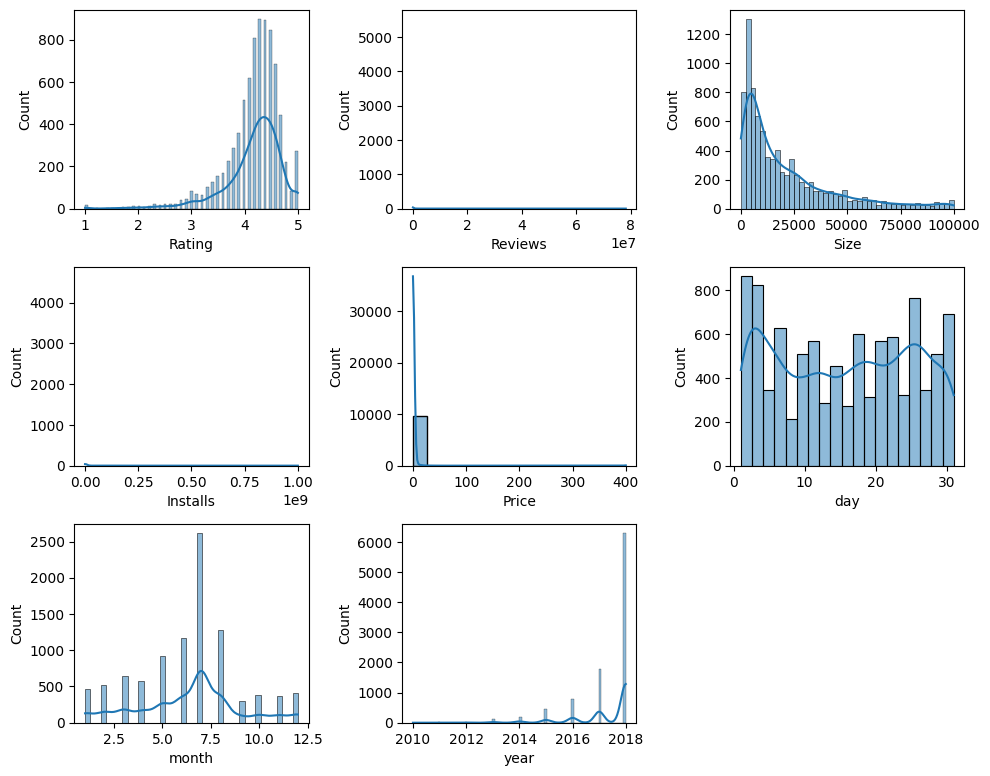

In [49]:
plt.figure(figsize=(10,10))
for num_col in numeric_features:
  plt.subplot(4,3,numeric_features.get_loc(num_col)+1)
  sns.histplot(df_copy[num_col],kde=True)
  plt.tight_layout()
plt.show()


### UNivariate

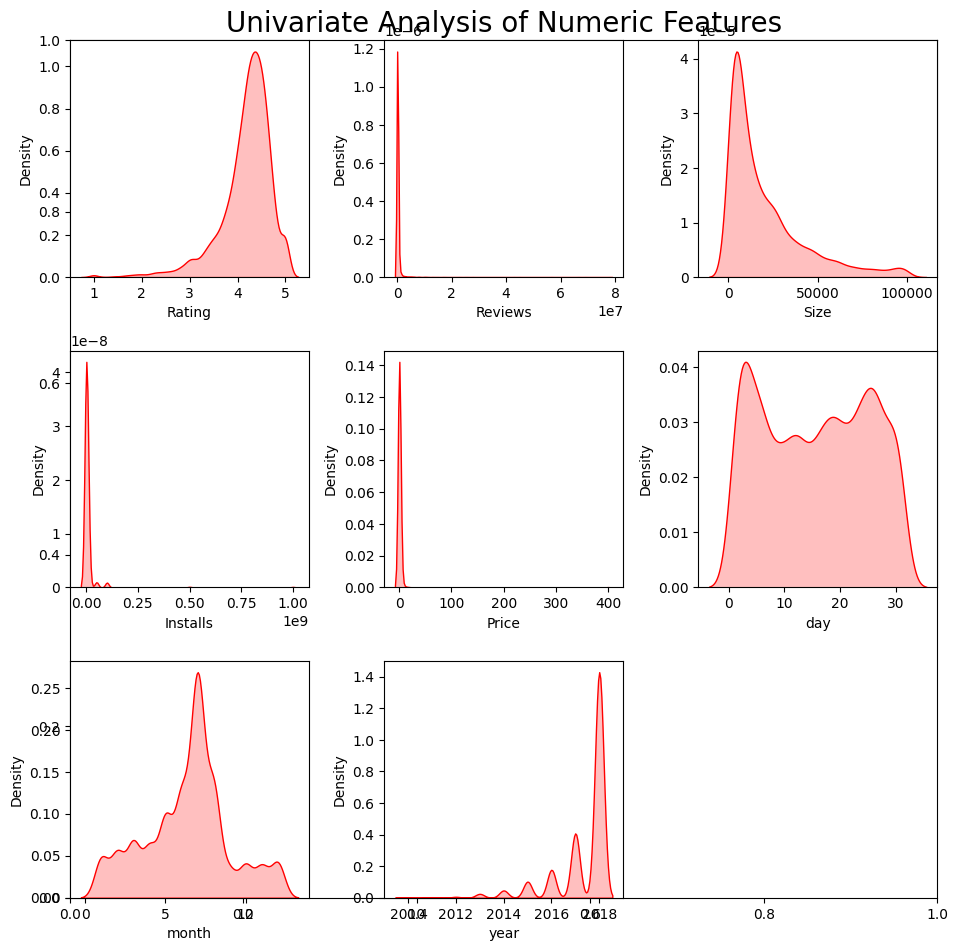

In [50]:

plt.figure(figsize=(10,10))
plt.title("Univariate Analysis of Numeric Features",fontsize=20,y=1)
for num_col in numeric_features:
  plt.subplot(3,3,numeric_features.get_loc(num_col)+1)
  sns.kdeplot(df_copy[num_col],fill=True,color='r')
  plt.tight_layout()
plt.show()


In [51]:
df_copy["Content Rating"].unique()

array(['Everyone', 'Teen', 'Everyone 10+', 'Mature 17+',
       'Adults only 18+', 'Unrated'], dtype=object)

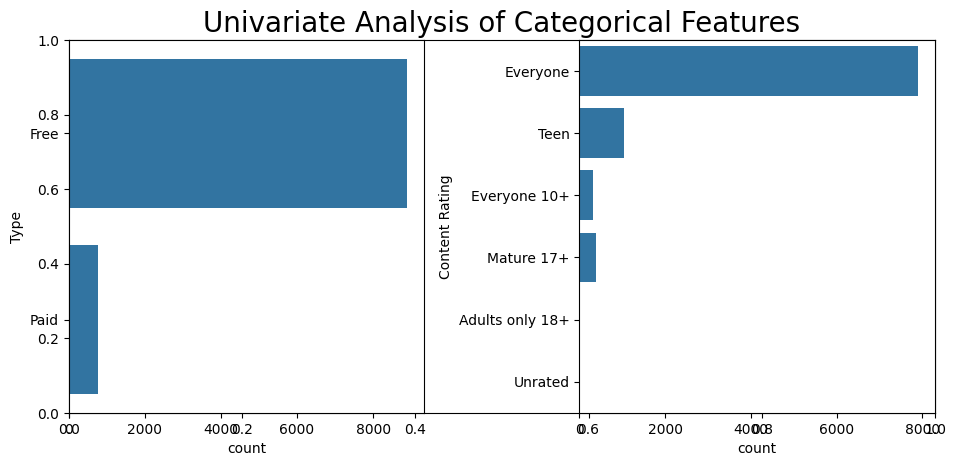

In [58]:
cat_col=["Type","Content Rating"]
plt.figure(figsize=(10,5))
plt.title("Univariate Analysis of Categorical Features",fontsize=20,y=1)
for cat_column in cat_col:
  plt.subplot(1,2,cat_col.index(cat_column)+1)
  sns.countplot(df_copy[cat_column])
  plt.tight_layout()
plt.show()


<Axes: ylabel='count'>

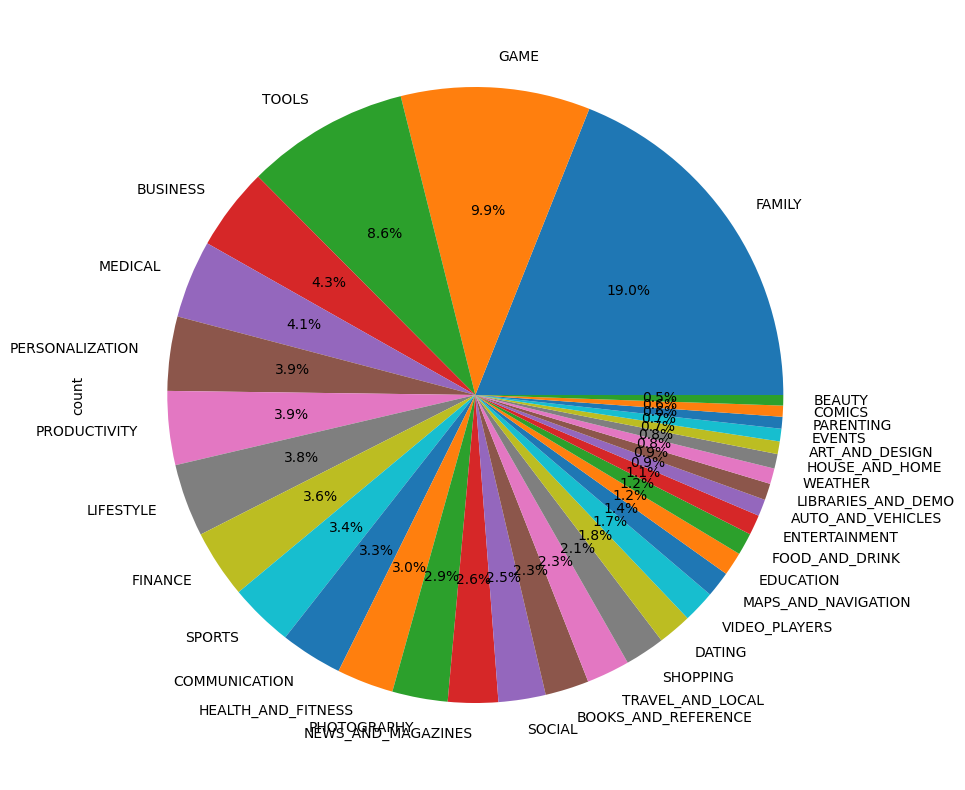

In [62]:
df_copy['Category'].value_counts().plot.pie(figsize=(10,10),autopct='%.1f%%')

In [63]:
df_copy.head(2)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018


<Axes: xlabel='Category'>

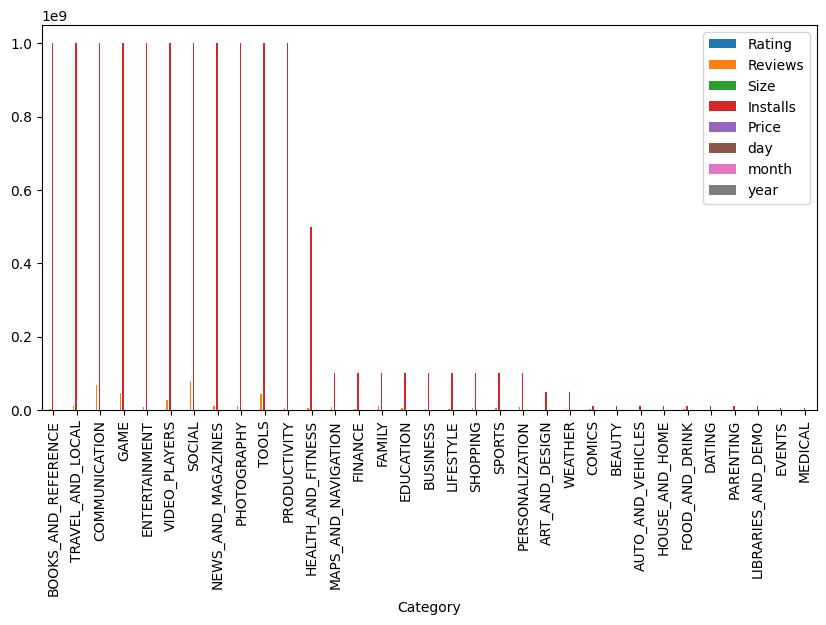

In [71]:
df_copy.groupby("Category").max(["Installs"]).sort_values("Installs",ascending=False).plot(kind="bar",figsize=(10,5))

In [99]:
df_copy.groupby(["Category"])["Installs"].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


In [94]:
df_cat_installs = df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending = False).reset_index()

In [78]:
df_copy.groupby("Category").agg({"Installs":"max"}).sort_values("Installs",ascending=False)

,Installs
Category,
BOOKS_AND_REFERENCE,1000000000
TRAVEL_AND_LOCAL,1000000000
COMMUNICATION,1000000000
GAME,1000000000
ENTERTAINMENT,1000000000
VIDEO_PLAYERS,1000000000
SOCIAL,1000000000
NEWS_AND_MAGAZINES,1000000000
PHOTOGRAPHY,1000000000


In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10840 entries, 0 to 10840
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  int64         
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int64         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
 13  day             10840 non-null  int32         
 14  month           10840 non-null  int32         
 15  year   

In [80]:
top5_apps_per_category = (
    df_copy.sort_values(by='Installs', ascending=False)
           .groupby('Category')
           .head(5)
           [['Category', 'App', 'Installs']]
           .reset_index(drop=True)
)


In [81]:
top5_apps_per_category

,Category,App,Installs
0,NEWS_AND_MAGAZINES,Google News,1000000000
1,SOCIAL,Google+,1000000000
2,GAME,Subway Surfers,1000000000
3,BOOKS_AND_REFERENCE,Google Play Books,1000000000
4,VIDEO_PLAYERS,YouTube,1000000000
...,...,...,...
160,PARENTING,Safe365 – Cell Phone GPS Locator For Your Family,1000000
161,PARENTING,My baby Game (Balloon POP!),1000000
162,BEAUTY,Mirror Camera (Mirror + Selfie Camera),1000000
163,BEAUTY,"Sephora: Skin Care, Beauty Makeup & Fragrance ...",1000000


In [87]:
df_copy.groupby("Category").head(5).sort_values("Installs",ascending=False)[["Category","App","Installs"]]

,Category,App,Installs
338,COMMUNICATION,Google Chrome: Fast & Secure,1000000000
335,COMMUNICATION,Messenger – Text and Video Chat for Free,1000000000
336,COMMUNICATION,WhatsApp Messenger,1000000000
2544,SOCIAL,Facebook,1000000000
1654,GAME,Subway Surfers,1000000000
...,...,...,...
477,DATING,Calculator,1000
1517,LIBRARIES_AND_DEMO,Lamp detector,1000
479,DATING,"Private Dating, Hide App- Blue for PrivacyHider",100
480,DATING,Ad Blocker for SayHi,100


In [ ]:
df_copy.groupby("Ratings").max

In [88]:
df_copy[df_copy["Rating"]==5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,37000.0,1000,Free,0.0,Everyone,Comics,2.0,4.0.3 and up,26,6,2018
612,American Girls Mobile Numbers,DATING,5.0,5,4400.0,1000,Free,0.0,Mature 17+,Dating,3.0,4.0.3 and up,17,7,2018
615,Awake Dating,DATING,5.0,2,70000.0,100,Free,0.0,Mature 17+,Dating,2.2.9,4.4 and up,24,7,2018
633,Spine- The dating app,DATING,5.0,5,9300.0,500,Free,0.0,Teen,Dating,4.0,4.0.3 and up,14,7,2018
636,Girls Live Talk - Free Text and Video Chat,DATING,5.0,6,5000.0,100,Free,0.0,Mature 17+,Dating,8.2,4.0.3 and up,1,8,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10721,Mad Dash Fo' Cash,GAME,5.0,14,16000.0,100,Free,0.0,Everyone,Arcade,2.5a,4.1 and up,19,6,2017
10742,GKPB FP Online Church,LIFESTYLE,5.0,32,7900.0,1000,Free,0.0,Everyone,Lifestyle,0.7.1,4.4 and up,31,12,2017
10776,Monster Ride Pro,GAME,5.0,1,24000.0,10,Free,0.0,Everyone,Racing,2.0,2.3 and up,5,3,2018
10820,Fr. Daoud Lamei,FAMILY,5.0,22,8600.0,1000,Free,0.0,Teen,Education,3.8.0,4.1 and up,27,6,2018


In [104]:
df_copy.groupby(["Category","App"])["Installs"].sum().sort_values(ascending=False).reset_index()

,Category,App,Installs
0,TRAVEL_AND_LOCAL,Maps - Navigate & Explore,1000000000
1,ENTERTAINMENT,Google Play Games,1000000000
2,VIDEO_PLAYERS,Google Play Movies & TV,1000000000
3,NEWS_AND_MAGAZINES,Google News,1000000000
4,COMMUNICATION,Skype - free IM & video calls,1000000000
...,...,...,...
9654,BUSINESS,CX Network,0
9655,FINANCE,Eu Sou Rico,0
9656,FAMILY,Command & Conquer: Rivals,0
9657,FINANCE,Eu sou Rico,0


In [112]:
df_copy[df_copy["Rating"]==5].groupby(["Category","App"])["Installs"].sum().sort_values(ascending=False).reset_index()

,Category,App,Installs
0,FAMILY,Ek Bander Ne Kholi Dukan,10000
1,LIFESTYLE,Oración CX,5000
2,TOOLS,CL Keyboard - Myanmar Keyboard (No Ads),5000
3,COMICS,"Superheroes, Marvel, DC, Comics, TV, Movies News",5000
4,FAMILY,Accounting Quiz (AQ) Malaysia,1000
...,...,...,...
266,MEDICAL,Clinic Doctor EHr,5
267,BOOKS_AND_REFERENCE,CZ-Help,5
268,GAME,Ra Ga Ba,1
269,GAME,Mu.F.O.,1
